## Parte 0

In [1]:
"""
Parte 0: Il Dataset

    Il datataset contiene dati che descrivono i dipendenti di una impresa secondo le seguenti
    feature (l’ordine delle feature nel dataset potrebbe essere diverso):
        1. Employee satisfaction level
        2. Last evaluation
        3. Number of projects
        4. Average monthly hours
        5. Time spent at the company
        6. Whether they have had a work accident
        7. Whether they have had a promotion in the last 5 years
        8. Sales
        9. Salary
        10. Whether the employee has left
        
Scopo finale del dataset è predire se un dipendente abbandonerà o meno l’impresa.

"""
# IMPORT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import (train_test_split, cross_val_score)
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import (accuracy_score, confusion_matrix)

%matplotlib inline

## Parte 1

### Punto 1.1

In [2]:
""" 
    Caricare il dataset e denominarlo con una variabile chiamata “dataset”
"""
dataset = pd.read_csv('HR_comma_sep_orig.csv')
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


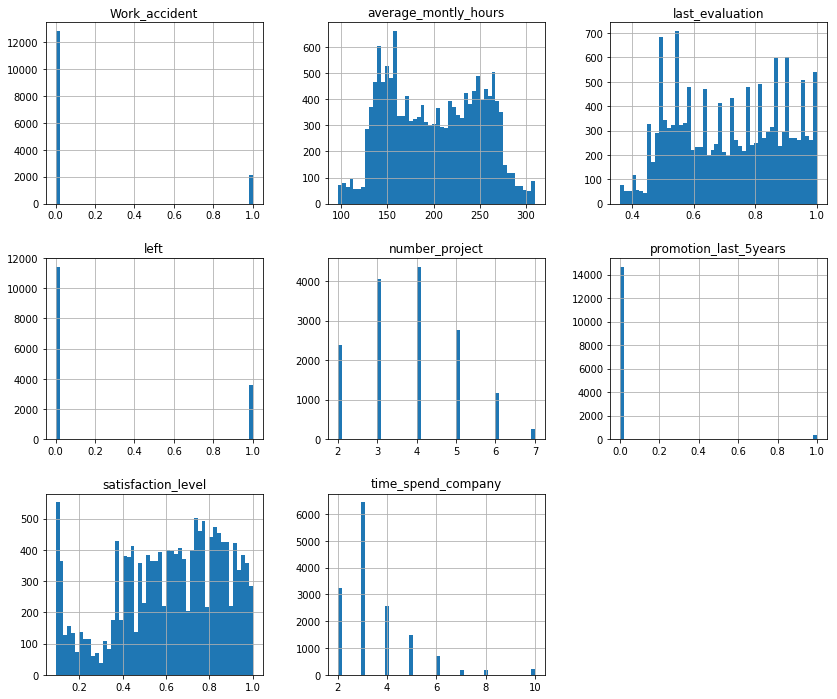

In [3]:
# Ai fini della didattica visualizzare le colonne del dataset
dataset.hist(figsize = (14, 12), bins = 50)
plt.show()

### Punto 1.2

In [4]:
"""
    Quante sono le istanze contenute nel dataset? Il dataset è completo (cioè per ogni istanza tutti 
    i valori di attributo sono sempre specificati – non esistono “missing values”)? Il dataset è bilanciato 
    per quanto riguarda la classe da predire? Osservando direttamente i dati, in che modo l’avere avuto
    una promozione negli ultimi 5 anni ha influito sulla scelta del dipendente di abbandonare l’impresa.
"""
# Calcolo il numero di istanze
num_istance = dataset.shape[0]
print('Numero di istanze: {}'.format(num_istance))

# Calcolo il numero di valori nulli
num_for_columns_NaN = dataset.isnull().sum()
num_NaN = num_for_columns_NaN.sum()
print('*' * 100)
print('Numero di instanze nulle: {}'.format(num_NaN))
    
# Considero ora la colonna 'left' ho una rappresentazione dei dipendenti che sono rimasti e quelli 
# che se ne sono andati
array_left = dataset.groupby(['left']).size()
num_yes = array_left[1]
num_no = array_left[0]
print('*' * 100)
print('Dipendenti che hanno lasciato la compagnia: {}'.format(num_yes))
print('Dipendenti che sono rimasti: {}'.format(num_no))
    
# Analizzo i dipendenti che hanno avuto una promozione
array_promotion = dataset.groupby(['promotion_last_5years']).size()
promotion_yes = array_promotion[1]
promotion_no = array_promotion[0]
print('*' * 100)
print('Dipendenti che hanno avuto una promozione: {}'.format(promotion_yes))
print('Dipendenti che non hanno avuto una promozione: {}'.format(promotion_no))
print('Il database non è bilanciato.')

functions = [np.mean, np.median, np.max, np.min]
values = ['left', 'promotion_last_5years','satisfaction_level', 'average_montly_hours', 
         'time_spend_company']
dataset_left_promotion = dataset[values]
dataset_left = dataset_left_promotion.groupby(['left', 'promotion_last_5years']).agg(functions)
print('*' * 100)
print(dataset_left)

Numero di istanze: 14999
****************************************************************************************************
Numero di instanze nulle: 0
****************************************************************************************************
Dipendenti che hanno lasciato la compagnia: 3571
Dipendenti che sono rimasti: 11428
****************************************************************************************************
Dipendenti che hanno avuto una promozione: 319
Dipendenti che non hanno avuto una promozione: 14680
Il database non è bilanciato.
****************************************************************************************************
                           satisfaction_level                     \
                                         mean median  amax  amin   
left promotion_last_5years                                         
0    0                               0.666766  0.690  1.00  0.12   
     1                               0.668433  0.695  1.0

### Punto 1.3

Soddisfazione media: 0.613
Mediana: 0.640


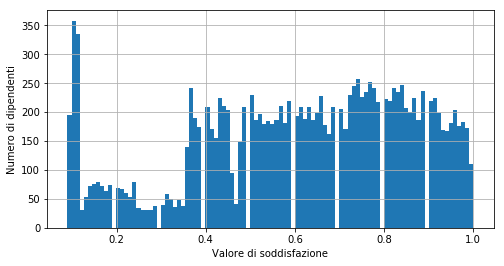

****************************************************************************************************
Le caratteristiche di questo blocco di dipendenti sono:
satisfaction_level         0.129832
last_evaluation            0.803935
number_project             5.484790
average_montly_hours     246.174110
time_spend_company         4.238188
Work_accident              0.102265
left                       0.598706
promotion_last_5years      0.010356
Name: 0.0 - 0.1, dtype: float64


In [5]:
"""
    Guardando la media e la mediana si evince che i dipendenti che lavorano nell’impresa sono 
    in generale soddisfatti? Se si rappresenta un istogramma della soddisfazione dei dipendenti 
    (usare il parametro bins=100 nella funzione che realizza l’istogramma) si osserva 
    che c’è un blocco iniziale di dipendenti per nulla soddisfatti. Calcolare il valore di 
    insoddisfazione di questo blocco di dipendenti.
    
    Che cosa hanno in comune questi dipendenti (a parte il livello di soddisfazione basso)?
"""
print('Soddisfazione media: {:.3f}'.format(dataset['satisfaction_level'].mean()))
print('Mediana: {:.3f}'.format(dataset['satisfaction_level'].median()))

array_satisfaction = dataset['satisfaction_level']
array_satisfaction.hist(figsize=(8, 4), bins = 100)
plt.xlabel('Valore di soddisfazione')
plt.ylabel('Numero di dipendenti')
plt.show()

# Creo le labels in automatico
labels = []
num_chunks = 10
for i in np.arange(0.0, 1.0, 0.1): # Va a 0.0 a 1.0 a step di 0.1
    label = '{:0.2} - {:0.2}'.format(i, i + 0.1)
    labels.append(label)

#satisfaction_grouped = pd.cut(dataset['satisfaction_level'], np.arange(0, 1.01, 0.1))
# Raggruppo i valori in 10 range 0.1 a 1.0
satisfaction_grouped = pd.qcut(dataset['satisfaction_level'], num_chunks, labels)
# Calcolo i valori medi di ogni gruppo
dataset_mean_sg = dataset.groupby(satisfaction_grouped).mean()
# Prendo il gruppo con soddisfazione minima
min_satisfaction = dataset_mean_sg.iloc[0]
print('*' * 100)
print('Le caratteristiche di questo blocco di dipendenti sono:\n{}'.format(min_satisfaction))

### Punto 1.4

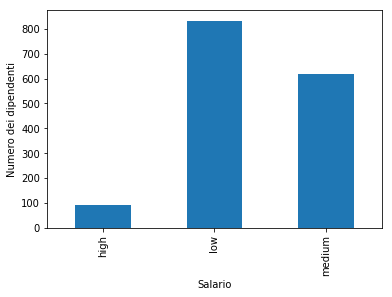

****************************************************************************************************
Il numero di dipendenti con salario inferiore a 0.22 hanno un salario
Alto: 92
Medio: 620
Basso: 833


In [6]:
"""
    Rappresentare in un grafico il salario dei dipendenti insoddisfatti descritti nel punto
    precedente.
"""
# Prendo il valore di soddisfazione minimo del secondo blocco
min_satisfacion_for_range = dataset['satisfaction_level'].groupby(satisfaction_grouped).min()
min_satisfaction = min_satisfacion_for_range.iloc[1]
# Ricerco i dipendenti che hanno un valore di soffisfazione minore di tale soglia
dip_ins = dataset[dataset['satisfaction_level'] < min_satisfaction]
salary = dip_ins.groupby(['salary']).size()
salary.plot(kind = 'bar')
plt.xlabel('Salario')
plt.ylabel('Numero dei dipendenti')
plt.show()
print('*' * 100)
salary_high = salary['high']
salary_medium = salary['medium']
salary_low = salary['low']
print('Il numero di dipendenti con salario inferiore a {} hanno un salario'.format(min_satisfaction))
print('Alto: {}'.format(salary_high))
print('Medio: {}'.format(salary_medium))
print('Basso: {}'.format(salary_low))

### Punto 1.5

In [7]:
"""
    Analizzare i settori (attributo “sales”) in cui i dipendenti insoddisfatti sono collocati.
    C’è un settore che è maggiormente fonte di disagio?
"""
# Calcolo i settori
series_sales = dip_ins.groupby(dip_ins['sales'], as_index = False).size()
# Li ordino per valore
series_sales = series_sales.sort_values(ascending = False)
# Nomi settori
names_sales = series_sales.index.values
# Prendo i primi cinque valori
max_sales = names_sales[: 5]
print('I settori in cui i dipendenti sono maggiormente insoddisfatti\n{}'.format(max_sales))
print('*' * 100)
print('In particolare si ha la seguente corrispondenza\n{}'.format(series_sales.head()))

I settori in cui i dipendenti sono maggiormente insoddisfatti
['sales' 'technical' 'support' 'IT' 'accounting']
****************************************************************************************************
In particolare si ha la seguente corrispondenza
sales
sales         428
technical     312
support       211
IT            131
accounting     91
dtype: int64


## Parte 2

### Punto 2.1

In [8]:
"""
    Scikit-learn utilizza un array numpy per effettuare le proprie predizioni. Gli elementi
    dell’array numpy devono essere delle stesso data type numerico. E’ necessario pertanto
    trasformare i dati del dataset per renderli utilizzabili con scikit.
    Creare un nuovo dataset dal precedente e chiamarlo reduced in si considerano
    unicamente le feature numeriche.
"""
reduced = dataset.drop(['sales', 'salary'], axis = 1)

### Punto 2.2

In [9]:
"""
    Nel dataset originale, trasformare i valori dei campi non numerici in numerici,
    utilizzando una opportuna funzione di trasformazione.
"""
le = LabelEncoder()
dataset = dataset.apply(le.fit_transform)
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,29,17,0,61,1,0,1,0,7,1
1,71,50,3,166,4,0,1,0,7,2
2,2,52,5,176,2,0,1,0,7,2
3,63,51,3,127,3,0,1,0,7,1
4,28,16,0,63,1,0,1,0,7,1


### Punto 2.3

In [10]:
"""
    Si vuole predire il il fatto che un dipendente abbia lasciato o meno l’impresa (feature
    left) sulla base degli altri attributi presenti nel dataset. Dividere i due dataset (quello
    originale e quello ridotto) in modo che 3⁄4 degli elementi siano contenuti in un nuovo
    dataset “train” e 1⁄4 nel dataset “test”.
    
    Valutare l’accuracy ottenuta con il modello MultinomialNB su entrambi i dataset
    (from sklearn.naive_bayes import MultinomialNB)
"""

X = dataset.drop('left', axis = 1)
Y = dataset['left']

# Splitto il dataset
test_size = 0.25
random_state = 147
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, 
                                                    random_state = random_state)
model_MNB = MultinomialNB()
model_MNB.fit(X_train, Y_train)
score = model_MNB.score(X_test, Y_test)
print('Accuracy: {:.3f}'.format(score))

Accuracy: 0.661


### Punto 2.4

In [11]:
"""
    Il valore di accuratezza ottenuto è pari a. 
    
    Cosa si scopre analizzando le confusion matrix?
"""


y_pred = model_MNB.predict(X_test)
accuracy_score(Y_test, y_pred)

print('Confusion matrix:\n{}'.format(confusion_matrix(Y_test, y_pred)))

Confusion matrix:
[[2190  658]
 [ 615  287]]


### Punto 2.5

In [12]:
"""
    Se si utilizza un modello basato su Decision Tree che valore di accuratezza si ottiene?
    Cambia qualcosa nella confusion matrix?
"""
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, Y_train)
print('Score: {}'.format(model_DT.score(X_test, Y_test)))
print('Confusion matrix:\n{}'.format(confusion_matrix(model_DT.predict(X_test), Y_test)))

Score: 0.9826666666666667
Confusion matrix:
[[2811   28]
 [  37  874]]


### Punto 2.6

In [13]:
"""
    Che valore di accuratezza si ottiene con un 5 Fold cross validation e il modello basato
    su Decision Tree? E il modello basato su MultinomialNB?
"""
num_folds = 5
random_state = 141
scoring = 'accuracy'

# Accuratezza Decision Tree
print('Score 5 Fold cross validation - DECISION TREE')
score_dt = cross_val_score(model_DT, X, Y, cv = num_folds, scoring = scoring)
print('Accuracy: {:0.3f} ({:0.3f})'.format(score_dt.mean(), score_dt.std()))

# Accuratezza MultinomialNB
print('Score 5 Fold cross validation - MULTINOMIALNB')
score_mnb = cross_val_score(model_MNB, X, Y, cv = num_folds, scoring = scoring)
print('Accuracy: {:0.3f} ({:0.3f})'.format(score_mnb.mean(), score_mnb.std()))

Score 5 Fold cross validation - DECISION TREE
Accuracy: 0.976 (0.009)
Score 5 Fold cross validation - MULTINOMIALNB
Accuracy: 0.656 (0.009)


### Punto 2.7

In [14]:
"""
    Creare un dataset bilanciato rispetto l’attributo “left”, e verificare se cambia
    l’accuratezza con un 5 Fold cross validation e il modello basato su Decision Tree
    e il modello basato su MultinomialNB.
"""
# I valori di 'left' sono:
left_yn = dataset['left'].value_counts()
num_no = left_yn[0]
num_yes = left_yn[1]
print('Valori: Classe SI {} - Classe No {}'.format(num_yes, num_no))

# Scelgo dunque i valori di NO uguali a quelli di si. 
# Il parametro 'replace' serve per non avere duplicati
dataset_yes = dataset[dataset['left'] == 0].sample(n = num_yes, replace = False)
# Prendo il dataset con i valori di no
dataset_no = dataset[dataset['left'] == 1]
# Unisco i due datagrame
dataset_balanced = pd.concat([dataset_yes, dataset_no])
print('*' * 100)
print('Il numero di righe conferma la suddivisione: {}'.format(dataset_balanced.shape[0]))
print('*' * 100)
XB = dataset_balanced.drop('left', axis = 1)
YB = dataset_balanced['left']

test_size = 0.25
random_state = 111

# Cross Validation
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('MNB', MultinomialNB()))

num_folds = 5
scoring = 'accuracy'
for name, model in models:
    scores = cross_val_score(model, XB, YB, cv = num_folds, scoring = scoring)
    print('{} score: {:.3f}% ({:.3f}%)'.format(name, scores.mean() * 100.0, scores.std() * 100.0))

Valori: Classe SI 3571 - Classe No 11428
****************************************************************************************************
Il numero di righe conferma la suddivisione: 7142
****************************************************************************************************
DT score: 96.499% (0.987%)
MNB score: 53.963% (1.648%)


### Punto 2.8

In [15]:
"""
    Creare une versione 1-of-V della matrice (indicator matrix) per quanto riguarda le
    colonne “sales” e “salary”. Si tratta di una matrice in cui ogni colonna è trasformata in
    un numero di colonne pari alla cardinalità (i valori unici) del dominio della colonna
    originale. Ogni cella nella colonna assume un valore 0 o 1 a seconda del fatto che il
    valore inizialmente contenuto dall’attributo sia uguale a quello rappresentato dalla
    colonna
    
    Calcolare l’accuratezza con i metodi precedenti. Migliora o peggiora? Questo tipo di
    trasformazione è in generale migliore o peggiore di quella effettuata al punto 2?
"""
# Ricarido il dataset perché i valori testuali nelle colonne 'salary' e 'sales' li ho convertiti
dataset = pd.read_csv('HR_comma_sep_orig.csv')

# Aggiungo le matrici
dummy_sales = pd.get_dummies(dataset['sales'])
dummy_salary = pd.get_dummies(dataset['salary'])
dataset = pd.concat([dataset, dummy_sales], axis = 1)
dataset = pd.concat([dataset, dummy_salary], axis = 1)

# Ricalcolo X e Y - Eliminando le righe 'salary' e 'sales'
X = dataset.drop('left', axis = 1)
X = X.drop(['salary', 'sales'], axis = 1)
Y = dataset['left']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = random_state)

# Modello MultinomialNB
model_MNB.fit(X_train, Y_train)
print('Accuracy MultinominalNB: {:0.3f}'.format(model_MNB.score(X_test, Y_test)))

# Modello Decision Tree
model_DT.fit(X_train, Y_train)
print('Accuracy Decision Tree: {:.03f}'.format(model_DT.score(X_test, Y_test)))

Accuracy MultinominalNB: 0.763
Accuracy Decision Tree: 0.984


### Punto 2.9

In [16]:
"""
    Raggruppare i valori dell’attributo “average_montly_hours” in 6 gruppi. Sostituire al
    valore originale dell’attributo un numero che va da 1 a 6 e che indica l’appartenenza
    allo specifico gruppo. Valutare l’accuratezza.
"""
# Uso X e Y modificati al punto precendente
# Per raggruppare uso la funzione 'qcut'
num_chunks = 6
name_labels = [1, 2, 3, 4, 5, 6]
chunks = pd.qcut(X['average_montly_hours'], q = num_chunks, labels = name_labels)

# Per evitare dei problemi in future esecuzioni (cambiando il valore della colonna poi da errori)
# la copia in un nuovo dataframe
X_chunks = X.copy()
X_chunks['average_montly_hours'] = chunks.values

# Ricalcolo X e Y
X_train, X_test, Y_train, Y_test = train_test_split(X_chunks, Y, test_size = 0.25, random_state = random_state)

# Modello MultinomialNB
model_MNB.fit(X_train, Y_train)
print('Accuracy MultinominalNB: {:0.3f}'.format(model_MNB.score(X_test, Y_test)))

# Modello Decision Tree
model_DT.fit(X_train, Y_train)
print('Accuracy Decision Tree: {:.03f}'.format(model_DT.score(X_test, Y_test)))

Accuracy MultinominalNB: 0.761
Accuracy Decision Tree: 0.975


### Punto 2.10

In [17]:
"""
    Si consideri un nuovo dataset ottenuto attraverso una variazione a piacere del
    precedente e si analizzi l’accuratezza ottenuta con un modello basato su Decision Tree.
    Che valore si ottiene?
"""
# Provo inizialmente a normalizzare il DataFrame
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
X_normalizer = normalizer.fit_transform(X_chunks)

# Poi mi considero solo le features più importanti
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

estimator = SVC(kernel = 'linear')
rfe = RFE(estimator = estimator, n_features_to_select= 10)
X_features = rfe.fit_transform(X_normalizer, Y)

# Ricalcolo X e Y
X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y, test_size = 0.25, random_state = random_state)

# Modello MultinomialNB
model_MNB.fit(X_train, Y_train)
print('Accuracy MultinominalNB: {:0.3f}'.format(model_MNB.score(X_test, Y_test)))

# Modello Decision Tree
model_DT.fit(X_train, Y_train)
print('Accuracy Decision Tree: {:.03f}'.format(model_DT.score(X_test, Y_test)))

Accuracy MultinominalNB: 0.763
Accuracy Decision Tree: 0.972
